## [Nonlinear] Artificial neural networks (ANN)

In [1]:
import matplotlib.pylab as plt 
import numpy as np

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27 # A4 format

#  simulated biological neuron activation

### Putting together  into a three-layers  structure
$W^{(1)}=[\bf{w}^{(1)\top}_1, \bf{w}^{(1)\top}_2,\bf{w}^{(1)\top}_3]$

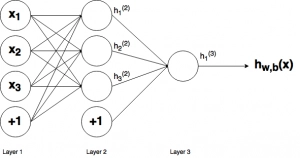

In [2]:
w1 = np.array([[.1,.1,.1],[.3,.3,.3],[.9,.9,.9]])

$W^{(2)}=[ {w}^{(2) }_1,  {w}^{(2) }_2, {w}^{(2)\ }_3]$

In [3]:
w2 = np.zeros((1,3))
w2 [0,:] = np.array([.6,.6,.6])

In [4]:
#  bias weight array/vector of layers
b1 = np.array([0.75,.075,.75])
b2 = np.array([.25])

In [5]:
def f(x):
     return 1/(1+np.exp(-x))



> feed-forward pass



$$\begin{align}
 h_1^{(2)} &= f(w_{11}^{(1)}x_1 + w_{12}^{(1)} x_2 + w_{13}^{(1)} x_3 + b_1^{(1)}) \\
 h_2^{(2)} &= f(w_{21}^{(1)}x_1 + w_{22}^{(1)} x_2 + w_{23}^{(1)} x_3 + b_2^{(1)}) \\
 h_3^{(2)} &= f(w_{31}^{(1)}x_1 + w_{32}^{(1)} x_2 + w_{33}^{(1)} x_3 + b_3^{(1)}) \\
 h_{W,b}(x) &= h_1^{(3)} = f(w_{11}^{(2)}h_1^{(2)} + w_{12}^{(2)} h_2^{(2)} + w_{13}^{(2)} h_3^{(2)} + b_1^{(2)})
 \end{align}$$

first attempt at a feed-forward function

In [6]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        #Setup the input array which the weights will be multiplied by for each layer
        #If it's the first layer, the input array will be the x input vector
        #If it's not the first layer, the input to the next layer will be the 
        #output of the previous layer
        if l == 0:
            node_in = x
        else:
            node_in = h
        #Setup the output array for the nodes in layer l + 1
        h = np.zeros((w[l].shape[0],))
        #loop through the rows of the weight array
        for i in range(w[l].shape[0]):
            #setup the sum inside the activation function
            f_sum = 0
            #loop through the columns of the weight array
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            #add the bias
            f_sum += b[l][i]
            #finally use the activation function to calculate the
            #i-th output i.e. h1, h2, h3
            h[i] = f(f_sum)
    return h

In [7]:
w = [w1, w2]
b = [b1, b2]
#a dummy x input vector
x = [1.5, 2.0, 3.0]

$$ \begin{align}
 h_1^{(2)} &= f(0.2*1.5 + 0.2*2.0 + 0.2*3.0 + 0.8) = 0.8909 \\
 h_2^{(2)} &= f(0.4*1.5 + 0.4*2.0 + 0.4*3.0 + 0.8) = 0.9677 \\
 h_3^{(2)} &= f(0.6*1.5 + 0.6*2.0 + 0.6*3.0 + 0.8) = 0.9909 \\
 h_{W,b}(x) &= h_1^{(3)} = f(0.5*0.8909 + 0.5*0.9677 + 0.5*0.9909 + 0.2) = 0.8354
 \end{align}$$

In [8]:
simple_looped_nn_calc(3, x, w, b)

array([0.86535911])

Vectorisation in neural networks

First note calculation
$$z_{1}^{(2)} = w_{11}^{(1)}x_1 + w_{12}^{(1)} x_2 + w_{13}^{(1)} x_3 + b_1^{(1)} = \sum_{j=1}^{n} w_{ij}^{(1)}x_i + b_{i}^{(1)}$$

Computation of remaining nodes:

$$\begin{align}
 z^{(2)} &= W^{(1)} x + b^{(1)} \\
 h^{(2)} &= f(z^{(2)}) \\
 z^{(3)} &= W^{(2)} h^{(2)} + b^{(2)} \\
 h_{W,b}(x) &= h^{(3)} = f(z^{(3)})
 \end{align}
 $$

forward propagation of the calculations through any number of layers in the neural network by generalising:

$$\begin{align}
 z^{(l+1)} &= W^{(l)} h^{(l)} + b^{(l)}   \\
 h^{(l+1)} &= f(z^{(l+1)})
 \end{align}$$

In [9]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

In [10]:
x_old = 0 # The value does not matter as long as abs(x_new - x_old) > precision
x_new = 6 # The algorithm starts at x=6
gamma = 0.01 # step size
precision = 0.00001

def df(x):
    y = 4 * x**3 - 9 * x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += -gamma * df(x_old)

print("The local minimum occurs at %f" % x_new)

The local minimum occurs at 2.249965


Main
http://adventuresinmachinelearning.com/neural-networks-tutorial/



1.   https://www.python-course.eu/dividing_lines_between_classes.php
2.   https://adventuresinmachinelearning.com/wp-content/uploads/2017/07/An-introduction-to-neural-networks-for-beginners.pdf
3.   https://deeplearning.lipingyang.orgposts-from-dr-andy-thomass-adventures-in-machine-learning/
4. 
http://adventuresinmachinelearning.com/neural-networks-tutorial/